In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import seaborn as sns



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("cyberbullying_tweets.csv")
my_tags = ['religion','age','gender','ethnicity','not_cyberbullying','other_cyberbullying']

In [3]:
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [4]:
# col = ['cyberbullying_type', 'tweet_text']
# df = df[col]
# df = df[pd.notnull(df['tweet_text'])]

In [5]:
X = df['tweet_text']
Y = df['cyberbullying_type']

In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [7]:
tfidf_vectorizer = TfidfVectorizer()
xTrain_tfidf = tfidf_vectorizer.fit_transform(xTrain)

In [8]:
# svm = SVC()
# param_grid = {
#     'C': [1, 10, 100],           # Regularization parameter
#     'kernel': ['linear', 'rbf'],  # Kernel type
#     'gamma': ['scale', 'auto'],   # Kernel coefficient
# }

svm = SVC()
param_grid = {
    'C': [1],           # Regularization parameter
    'kernel': ['linear'],  # Kernel type
    'gamma': ['auto'],   # Kernel coefficient
}



In [9]:
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(xTrain_tfidf, yTrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1], 'gamma': ['auto'], 'kernel': ['linear']})

In [10]:
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

In [11]:
best_params

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [12]:
best_svm

SVC(C=1, gamma='auto', kernel='linear')

In [13]:
xTest_tfidf = tfidf_vectorizer.transform(xTest)
accuracy = best_svm.score(xTest_tfidf, yTest)

In [14]:
accuracy

0.8401299926617046

In [15]:
y_pred = best_svm.predict(xTest_tfidf)

In [16]:
y_pred

array(['ethnicity', 'gender', 'ethnicity', ..., 'age', 'ethnicity',
       'other_cyberbullying'], dtype=object)

In [17]:
cm = confusion_matrix(yTest, y_pred)

In [19]:
print('accuracy %s' % accuracy_score(y_pred, yTest))
print(classification_report(yTest, y_pred,target_names=my_tags))

accuracy 0.8401299926617046
                     precision    recall  f1-score   support

           religion       0.96      0.98      0.97      1603
                age       0.98      0.98      0.98      1603
             gender       0.90      0.86      0.88      1531
          ethnicity       0.63      0.55      0.59      1624
  not_cyberbullying       0.64      0.73      0.68      1612
other_cyberbullying       0.95      0.95      0.95      1566

           accuracy                           0.84      9539
          macro avg       0.84      0.84      0.84      9539
       weighted avg       0.84      0.84      0.84      9539



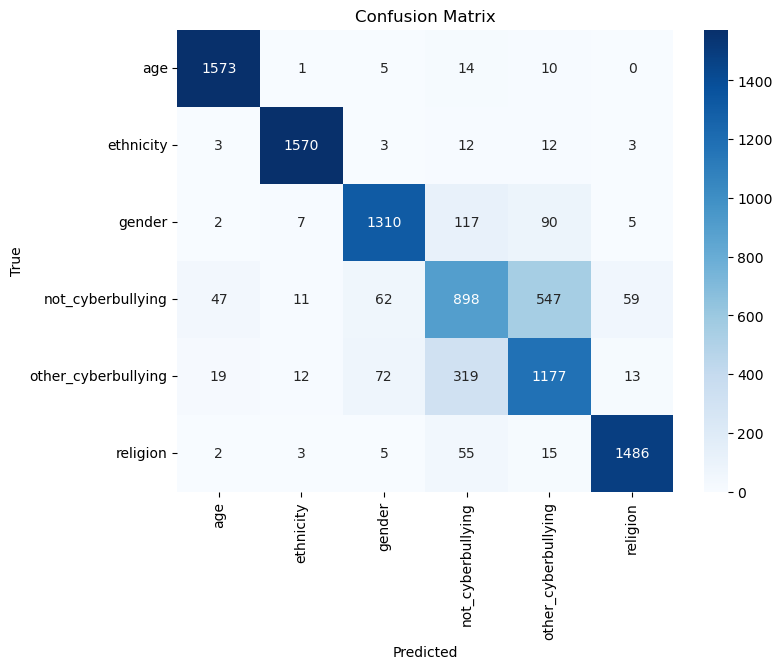

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_svm.classes_, yticklabels=best_svm.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()